In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# data = '/content/로트 데이터 이력.csv'
data = '/content/drive/MyDrive/반도체 프로젝트/로트 데이터 이력.csv'
df= pd.read_csv(data)
df

,S Lot,Post Thickness(A),dressing step sec,Etch Si RIE,Chamber,Etch test 적용 이력,CVD test 적용 이력
0,#1,4984,2,4670,A,test1,NaN
1,#2,5102,2,4689,B,test1,NaN
2,#3,5455,2,4695,C,test1,NaN
3,#4,5125,2,4721,A,test1,NaN
4,#5,5099,2,4652,B,test1,NaN
5,#6,5398,2,4822,C,NaN,test3
6,#7,5158,2,4788,A,NaN,test3
7,#8,5109,2,4762,B,NaN,test3
8,#9,5411,2,4785,C,NaN,test3
9,#10,4985,2,4785,A,NaN,test3


In [7]:
# CMP Post Target : 5000A +/- 400A
# Etch Post Target : 4800A +/-150A

Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


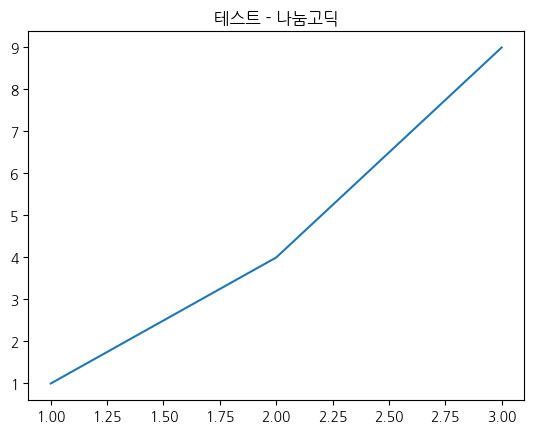

In [8]:
# 1) 폰트 설치
!apt-get -qq install fonts-nanum

# 2) 런타임에 폰트 캐시 리셋
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 경로 확인
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# Matplotlib에 폰트 등록
fm.fontManager.addfont(font_path)
mpl.rc('font', family='NanumGothic')

# 한글이 깨지지 않는지 테스트
plt.plot([1, 2, 3], [1, 4, 9])
plt.title("테스트 - 나눔고딕")
plt.show()

# 1. 공정능력 지수 분석

In [9]:
import pandas as pd
import numpy as np

# 규격 상한/하한
LSL_thick = 4600
USL_thick = 5400

LSL_etch = 4600  # 임시 설정, 실제 기준값이 있으면 수정
USL_etch = 5400  # 임시 설정

def calc_cp_cpk(series, LSL, USL):
    sigma = series.std(ddof=1)
    mean_val = series.mean()
    Cp = (USL - LSL) / (6*sigma)
    Cpk = min((USL - mean_val)/(3*sigma), (mean_val - LSL)/(3*sigma))
    return Cp, Cpk, mean_val, sigma

# -------------------- Post Thickness --------------------
Cp_thick, Cpk_thick, mean_thick, std_thick = calc_cp_cpk(df["Post Thickness(A)"], LSL_thick, USL_thick)
print("📌 Post Thickness(A) 공정능력")
print(f"Mean={mean_thick:.2f}, Std={std_thick:.2f}")
print(f"Cp={Cp_thick:.3f}, Cpk={Cpk_thick:.3f}")

# -------------------- Etch Si RIE --------------------
Cp_etch, Cpk_etch, mean_etch, std_etch = calc_cp_cpk(df["Etch Si RIE"], LSL_etch, USL_etch)
print("\n📌 Etch Si RIE 공정능력")
print(f"Mean={mean_etch:.2f}, Std={std_etch:.2f}")
print(f"Cp={Cp_etch:.3f}, Cpk={Cpk_etch:.3f}")


📌 Post Thickness(A) 공정능력
Mean=5154.48, Std=180.84
Cp=0.737, Cpk=0.453

📌 Etch Si RIE 공정능력
Mean=4798.16, Std=85.73
Cp=1.555, Cpk=0.771


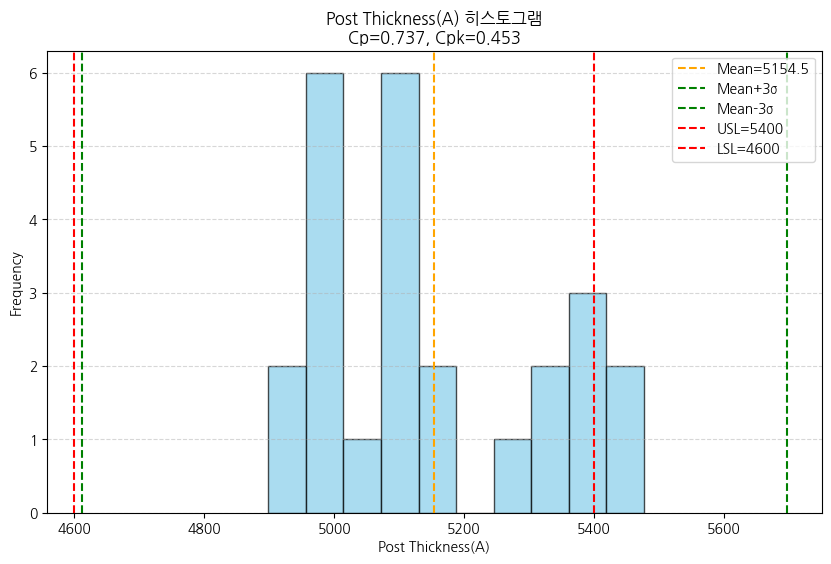

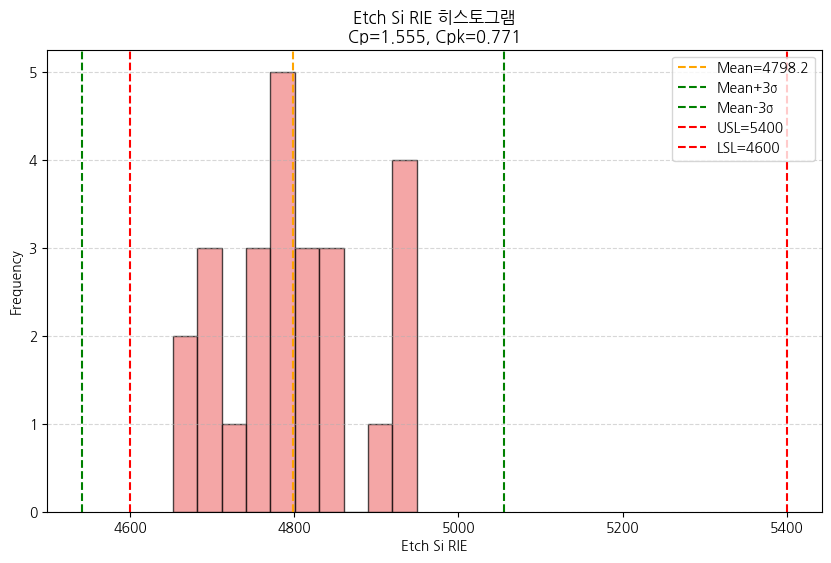

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 공정능력 계산
def calc_cp_cpk(series, LSL, USL):
    mean_val = series.mean()
    sigma = series.std(ddof=1)
    Cp = (USL - LSL) / (6*sigma)
    Cpk = min((USL - mean_val)/(3*sigma), (mean_val - LSL)/(3*sigma))
    return Cp, Cpk, mean_val, sigma

# 규격 상/하한
LSL_thick, USL_thick = 4600, 5400
LSL_etch, USL_etch = 4600, 5400

# -------------------- Post Thickness(A) --------------------
series = df["Post Thickness(A)"]
Cp, Cpk, mean_val, sigma = calc_cp_cpk(series, LSL_thick, USL_thick)

plt.figure(figsize=(10,6))
plt.hist(series, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_val, color='orange', linestyle='--', label=f'Mean={mean_val:.1f}')
plt.axvline(mean_val + 3*sigma, color='green', linestyle='--', label=f'Mean+3σ')
plt.axvline(mean_val - 3*sigma, color='green', linestyle='--', label=f'Mean-3σ')
plt.axvline(USL_thick, color='red', linestyle='--', label=f'USL={USL_thick}')
plt.axvline(LSL_thick, color='red', linestyle='--', label=f'LSL={LSL_thick}')
plt.title(f"Post Thickness(A) 히스토그램\nCp={Cp:.3f}, Cpk={Cpk:.3f}")
plt.xlabel("Post Thickness(A)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# -------------------- Etch Si RIE --------------------
series = df["Etch Si RIE"]
Cp, Cpk, mean_val, sigma = calc_cp_cpk(series, LSL_etch, USL_etch)

plt.figure(figsize=(10,6))
plt.hist(series, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(mean_val, color='orange', linestyle='--', label=f'Mean={mean_val:.1f}')
plt.axvline(mean_val + 3*sigma, color='green', linestyle='--', label=f'Mean+3σ')
plt.axvline(mean_val - 3*sigma, color='green', linestyle='--', label=f'Mean-3σ')
plt.axvline(USL_etch, color='red', linestyle='--', label=f'USL={USL_etch}')
plt.axvline(LSL_etch, color='red', linestyle='--', label=f'LSL={LSL_etch}')
plt.title(f"Etch Si RIE 히스토그램\nCp={Cp:.3f}, Cpk={Cpk:.3f}")
plt.xlabel("Etch Si RIE")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


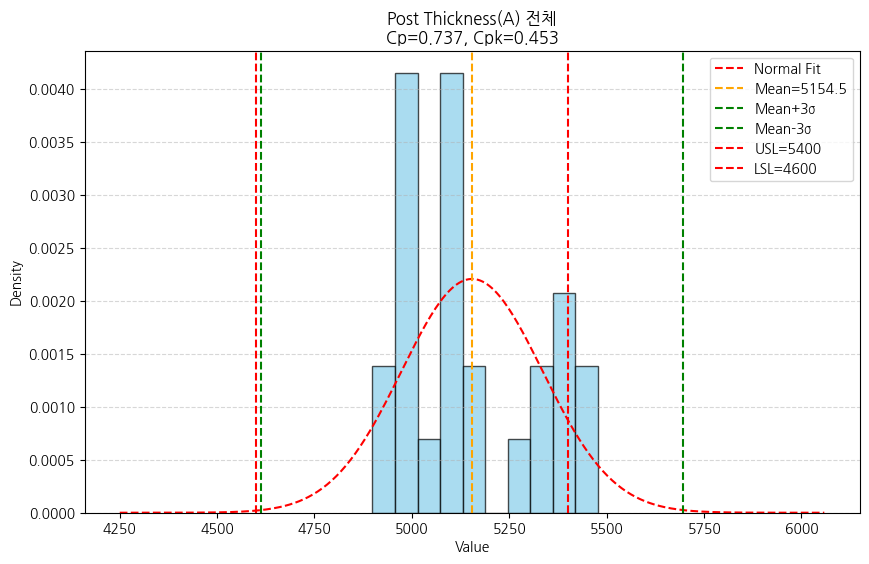

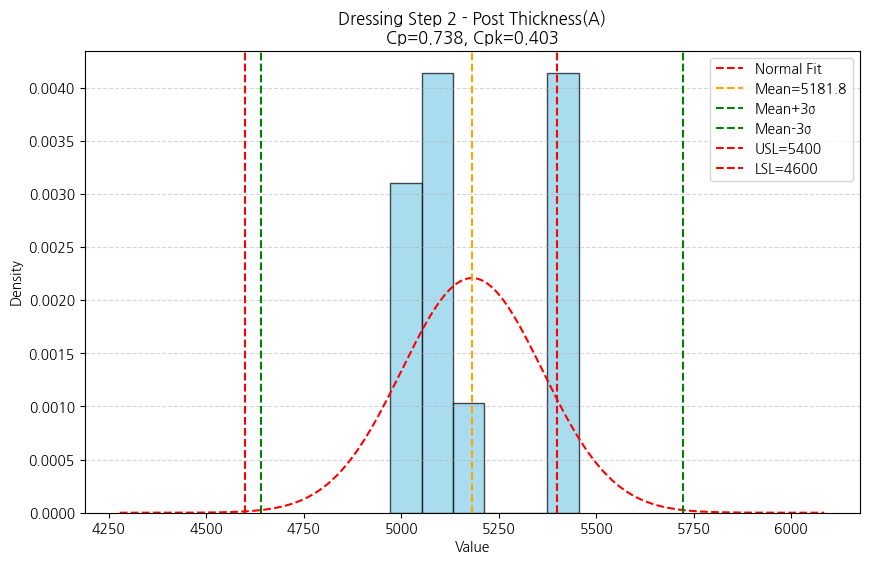

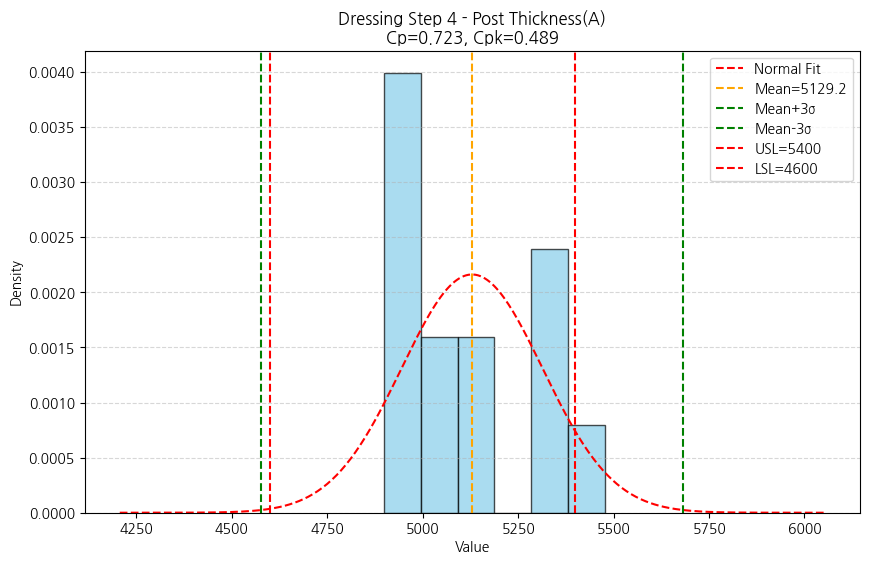

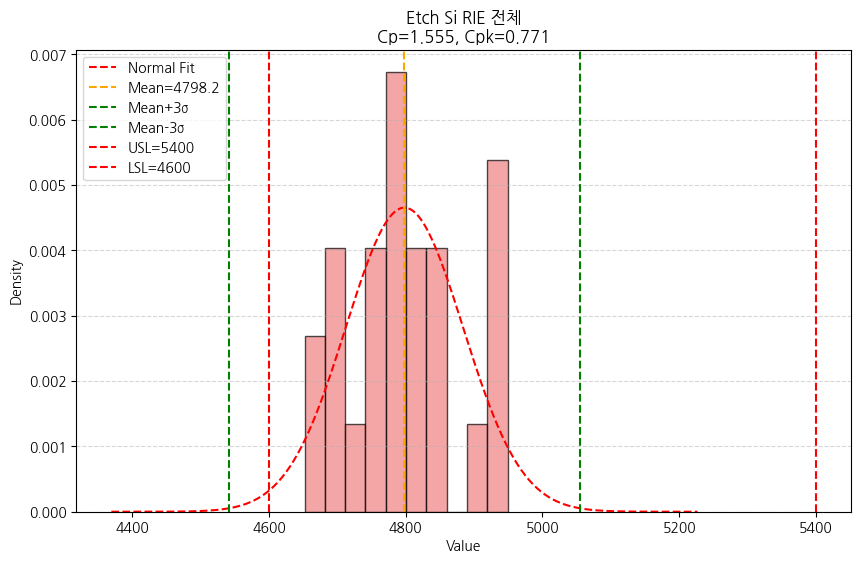

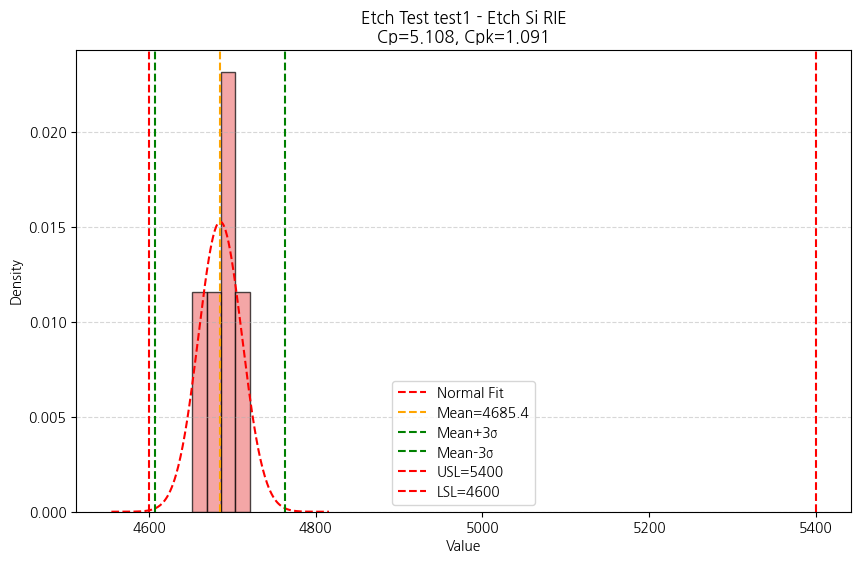

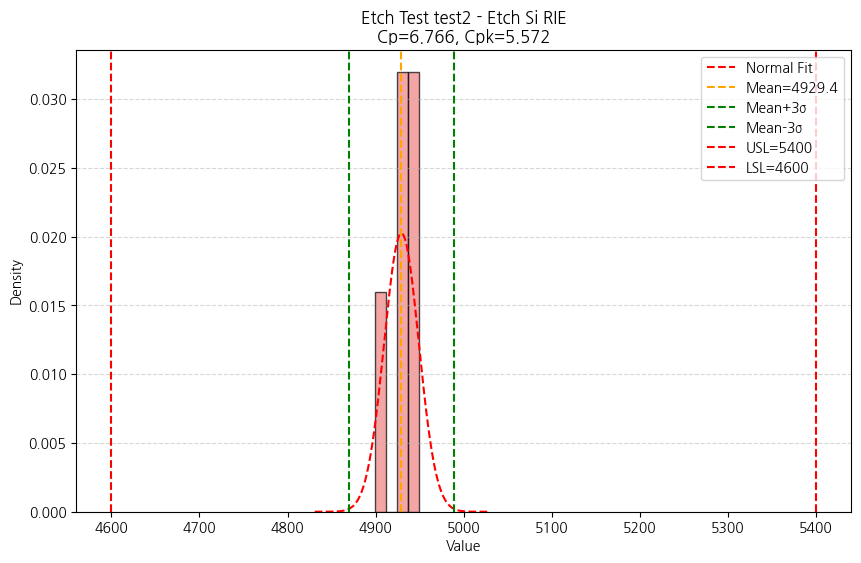

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# -------------------- 공정능력 계산 함수 --------------------
def calc_cp_cpk(series, LSL, USL):
    mean_val = series.mean()
    sigma = series.std(ddof=1)
    Cp = (USL - LSL) / (6*sigma)
    Cpk = min((USL - mean_val)/(3*sigma), (mean_val - LSL)/(3*sigma))
    return Cp, Cpk, mean_val, sigma

# -------------------- 히스토그램 + 정규분포 함수 --------------------
def plot_histogram(series, LSL, USL, title, bins=10, color='skyblue'):
    Cp, Cpk, mean_val, sigma = calc_cp_cpk(series, LSL, USL)

    plt.figure(figsize=(10,6))
    count, bin_edges, _ = plt.hist(series, bins=bins, color=color, edgecolor='black', alpha=0.7, density=True)

    # 정규분포 x축: 평균 ± 5σ
    x = np.linspace(mean_val - 5*sigma, mean_val + 5*sigma, 300)
    pdf = norm.pdf(x, mean_val, sigma)
    plt.plot(x, pdf, 'r--', label='Normal Fit')

    # 기준선
    plt.axvline(mean_val, color='orange', linestyle='--', label=f'Mean={mean_val:.1f}')
    plt.axvline(mean_val + 3*sigma, color='green', linestyle='--', label=f'Mean+3σ')
    plt.axvline(mean_val - 3*sigma, color='green', linestyle='--', label=f'Mean-3σ')
    plt.axvline(USL, color='red', linestyle='--', label=f'USL={USL}')
    plt.axvline(LSL, color='red', linestyle='--', label=f'LSL={LSL}')

    plt.title(f"{title}\nCp={Cp:.3f}, Cpk={Cpk:.3f}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# -------------------- Post Thickness(A) 전체 --------------------
plot_histogram(df["Post Thickness(A)"], LSL=4600, USL=5400, title="Post Thickness(A) 전체", bins=10, color='skyblue')

# -------------------- Post Thickness(A) Step별 --------------------
for step, group in df.groupby("dressing step sec")["Post Thickness(A)"]:
    plot_histogram(group, LSL=4600, USL=5400, title=f"Dressing Step {step} - Post Thickness(A)", bins=6, color='skyblue')

# -------------------- Etch Si RIE 전체 --------------------
plot_histogram(df["Etch Si RIE"], LSL=4600, USL=5400, title="Etch Si RIE 전체", bins=10, color='lightcoral')

# -------------------- Etch Si RIE Etch Test별 --------------------
for test, group in df.dropna(subset=["Etch test 적용 이력"]).groupby("Etch test 적용 이력")["Etch Si RIE"]:
    plot_histogram(group, LSL=4600, USL=5400, title=f"Etch Test {test} - Etch Si RIE", bins=4, color='lightcoral')


# 2. 관리도

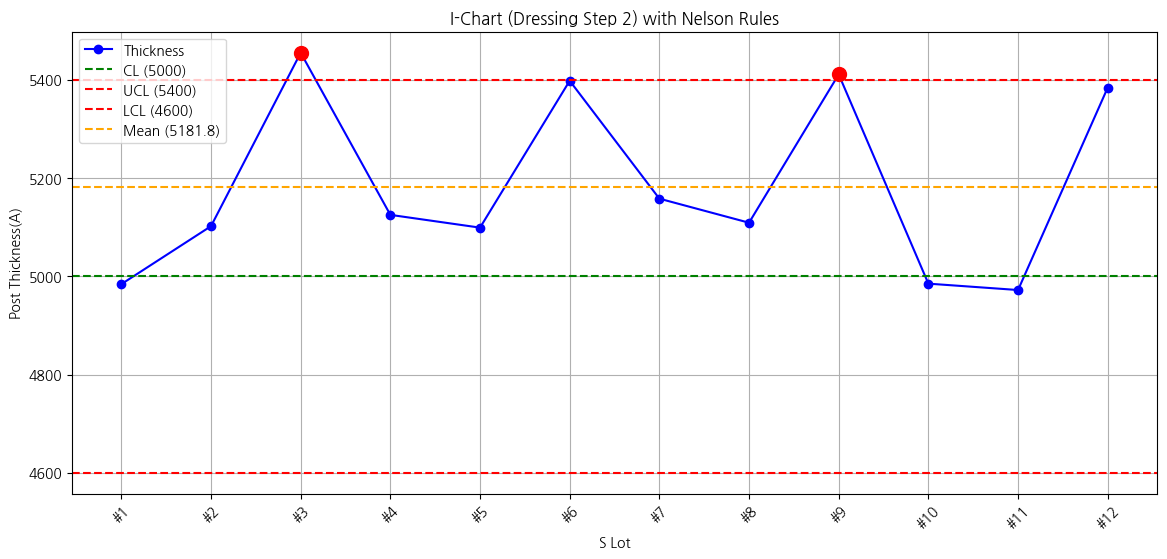

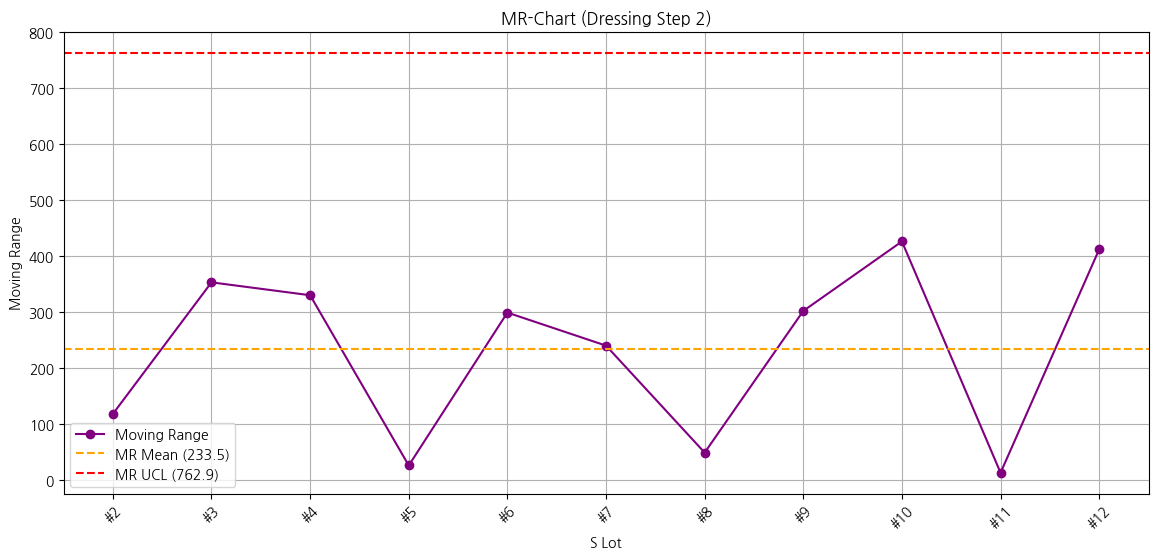


📌 Nelson Rules Violations (Dressing Step 2)
 - #3 (Value=5455): Rule 1: Beyond control limit
 - #9 (Value=5411): Rule 1: Beyond control limit


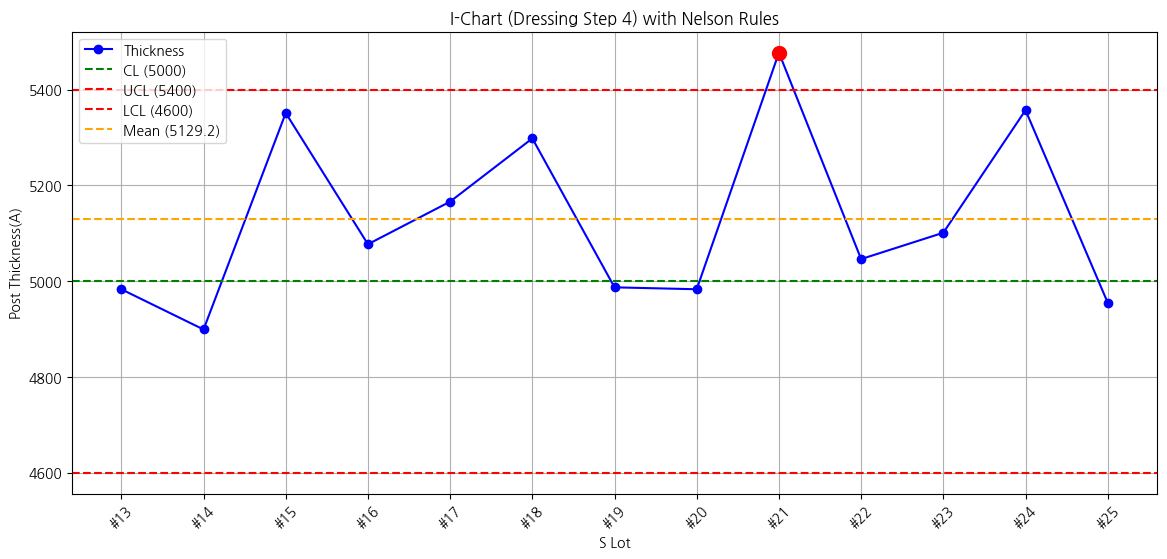

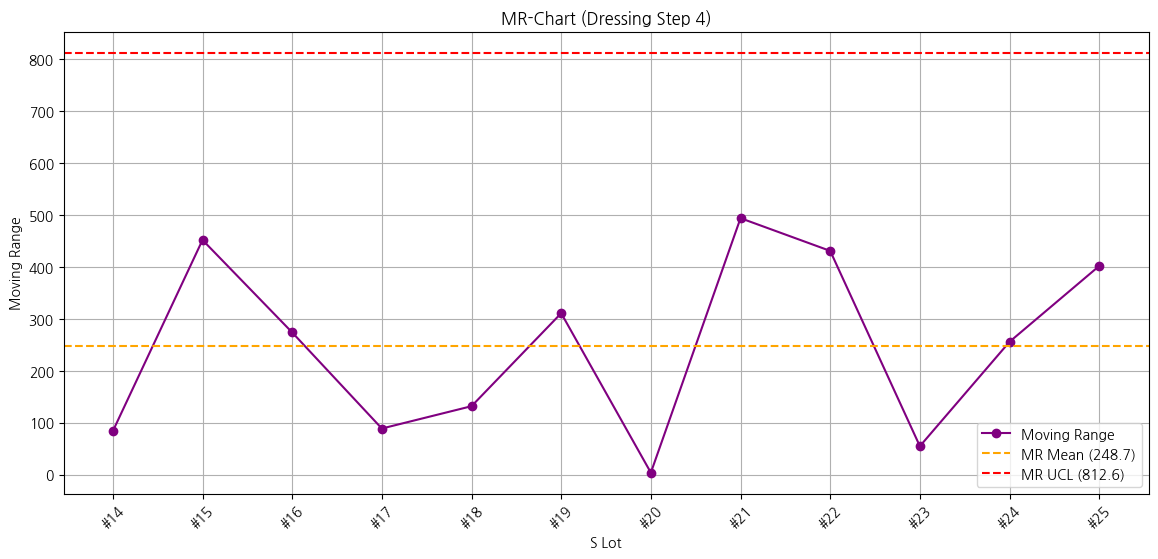


📌 Nelson Rules Violations (Dressing Step 4)
 - #21 (Value=5477): Rule 1: Beyond control limit


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 관리도 기준선
CL = 5000
UCL = 5400
LCL = 4600

def apply_nelson_rules(values, CL):
    """
    Nelson(슈하트) 규칙 적용 → 이상점 index와 사유 리턴
    """
    sigma = values.std()
    reasons = {}

    # 1. 한 점이 관리한계 벗어남
    for i, v in enumerate(values):
        if v > UCL or v < LCL:
            reasons[i] = reasons.get(i, []) + ["Rule 1: Beyond control limit"]

    # 2. 9 points on same side of CL
    for i in range(len(values)-8):
        window = values[i:i+9]
        if all(window > CL) or all(window < CL):
            for j in range(i, i+9):
                reasons[j] = reasons.get(j, []) + ["Rule 2: 9 points same side of CL"]

    # 3. 6 points increasing or decreasing
    for i in range(len(values)-5):
        window = values[i:i+6]
        if all(np.diff(window) > 0):
            for j in range(i, i+6):
                reasons[j] = reasons.get(j, []) + ["Rule 3: 6 increasing"]
        if all(np.diff(window) < 0):
            for j in range(i, i+6):
                reasons[j] = reasons.get(j, []) + ["Rule 3: 6 decreasing"]

    # 4. 14 points alternating
    for i in range(len(values)-13):
        diffs = np.diff(values[i:i+14])
        if all(diffs[j]*diffs[j+1] < 0 for j in range(len(diffs)-1)):
            for j in range(i, i+14):
                reasons[j] = reasons.get(j, []) + ["Rule 4: 14 alternating"]

    # 5. 2 of 3 beyond 2σ
    for i in range(len(values)-2):
        window = values[i:i+3]
        count = sum((abs(window-CL) > 2*sigma))
        if count >= 2:
            for j in range(i, i+3):
                if abs(values[j]-CL) > 2*sigma:
                    reasons[j] = reasons.get(j, []) + ["Rule 5: 2 of 3 beyond 2σ"]

    # 6. 4 of 5 beyond 1σ
    for i in range(len(values)-4):
        window = values[i:i+5]
        count = sum((abs(window-CL) > 1*sigma))
        if count >= 4:
            for j in range(i, i+5):
                if abs(values[j]-CL) > 1*sigma:
                    reasons[j] = reasons.get(j, []) + ["Rule 6: 4 of 5 beyond 1σ"]

    # 7. 15 within 1σ
    for i in range(len(values)-14):
        window = values[i:i+15]
        if all(abs(window-CL) < 1*sigma):
            for j in range(i, i+15):
                reasons[j] = reasons.get(j, []) + ["Rule 7: 15 within 1σ"]

    # 8. 8 beyond 1σ
    for i in range(len(values)-7):
        window = values[i:i+8]
        if all(abs(window-CL) > 1*sigma):
            for j in range(i, i+8):
                reasons[j] = reasons.get(j, []) + ["Rule 8: 8 beyond 1σ"]

    return reasons

def plot_imr(df, step):
    subset = df[df["dressing step sec"] == step].reset_index(drop=True)
    values = subset["Post Thickness(A)"]

    # 평균
    mean_val = values.mean()

    # Nelson rules 적용
    anomalies = apply_nelson_rules(values, CL)

    # -------------------- I-Chart --------------------
    plt.figure(figsize=(14,6))
    plt.plot(subset["S Lot"], values, marker="o", color="blue", label="Thickness")

    # 기준선
    plt.axhline(CL, color="green", linestyle="--", label="CL (5000)")
    plt.axhline(UCL, color="red", linestyle="--", label="UCL (5400)")
    plt.axhline(LCL, color="red", linestyle="--", label="LCL (4600)")
    plt.axhline(mean_val, color="orange", linestyle="--", label=f"Mean ({mean_val:.1f})")

    # 이상점 표시
    for idx in anomalies.keys():
        plt.scatter(subset["S Lot"].iloc[idx], values.iloc[idx],
                    color="red", s=100, zorder=5)

    plt.title(f"I-Chart (Dressing Step {step}) with Nelson Rules")
    plt.xlabel("S Lot")
    plt.ylabel("Post Thickness(A)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    # -------------------- MR-Chart --------------------
    MR = values.diff().abs().dropna()
    MR_mean = MR.mean()
    MR_UCL = MR_mean * 3.268  # n=2일 때 D4=3.268

    plt.figure(figsize=(14,6))
    plt.plot(subset["S Lot"].iloc[1:], MR, marker="o", color="purple", label="Moving Range")
    plt.axhline(MR_mean, color="orange", linestyle="--", label=f"MR Mean ({MR_mean:.1f})")
    plt.axhline(MR_UCL, color="red", linestyle="--", label=f"MR UCL ({MR_UCL:.1f})")

    plt.title(f"MR-Chart (Dressing Step {step})")
    plt.xlabel("S Lot")
    plt.ylabel("Moving Range")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

    # -------------------- 이상점 로그 출력 --------------------
    if anomalies:
        print(f"\n📌 Nelson Rules Violations (Dressing Step {step})")
        for idx, rules in anomalies.items():
            lot = subset['S Lot'].iloc[idx]
            val = values.iloc[idx]
            print(f" - {lot} (Value={val}): {', '.join(rules)}")
    else:
        print(f"\n✅ Dressing Step {step}: 이상 없음")

# Step=2
plot_imr(df, 2)

# Step=4
plot_imr(df, 4)


# 3. Etch 테스트 분석

📊 그룹별 통계치
                   mean        std  count
Etch test 적용 이력                          
test1            4685.4  26.101724      5
test2            4929.4  19.705329      5

📌 t-test 결과: t=-16.683, p=0.0000
 → 두 그룹 평균은 유의하게 다릅니다.


/tmp/ipython-input-781246022.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Etch test 적용 이력", y="Etch Si RIE", data=etch_df, palette="Set2")


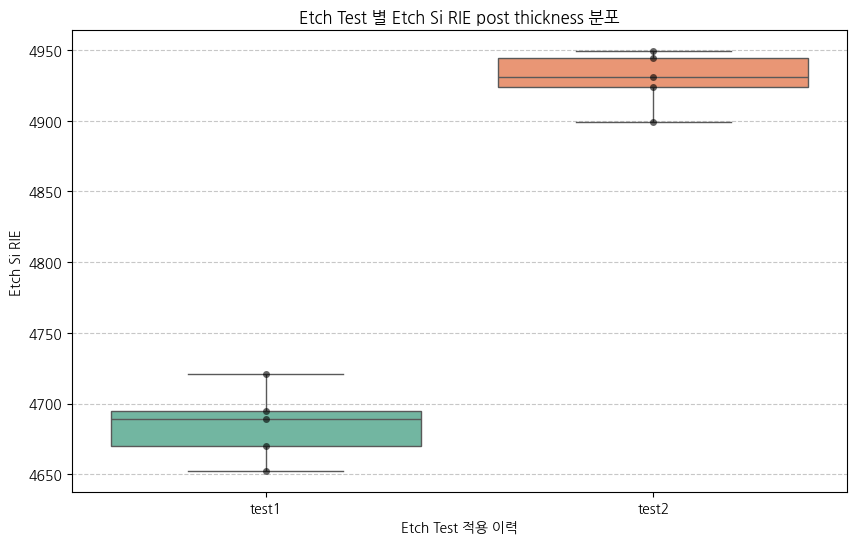

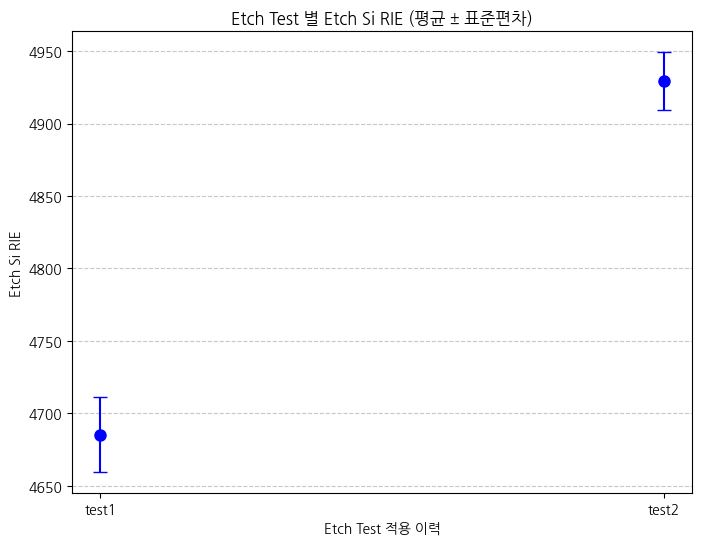

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Etch test만 있는 데이터만 추출
etch_df = df.dropna(subset=["Etch test 적용 이력"])

# 그룹별 기초 통계
stats_summary = etch_df.groupby("Etch test 적용 이력")["Etch Si RIE"].agg(["mean","std","count"])
print("📊 그룹별 통계치")
print(stats_summary)

# t-test (test1 vs test2)
test1_vals = etch_df[etch_df["Etch test 적용 이력"]=="test1"]["Etch Si RIE"]
test2_vals = etch_df[etch_df["Etch test 적용 이력"]=="test2"]["Etch Si RIE"]
t_stat, p_val = stats.ttest_ind(test1_vals, test2_vals, equal_var=False)

print(f"\n📌 t-test 결과: t={t_stat:.3f}, p={p_val:.4f}")
if p_val < 0.05:
    print(" → 두 그룹 평균은 유의하게 다릅니다.")
else:
    print(" → 두 그룹 평균 차이는 통계적으로 유의하지 않습니다.")

# -------------------- 시각화 --------------------
plt.figure(figsize=(10,6))
sns.boxplot(x="Etch test 적용 이력", y="Etch Si RIE", data=etch_df, palette="Set2")
sns.swarmplot(x="Etch test 적용 이력", y="Etch Si RIE", data=etch_df, color="black", alpha=0.6)

plt.title("Etch Test 별 Etch Si RIE post thickness 분포")
plt.xlabel("Etch Test 적용 이력")
plt.ylabel("Etch Si RIE")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

# 평균 ± 표준편차 에러바 그림
plt.figure(figsize=(8,6))
plt.errorbar(stats_summary.index, stats_summary["mean"],
             yerr=stats_summary["std"], fmt="o", capsize=5, markersize=8, color="blue")
plt.title("Etch Test 별 Etch Si RIE (평균 ± 표준편차)")
plt.ylabel("Etch Si RIE")
plt.xlabel("Etch Test 적용 이력")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()


# 4. 챔버별 주효과도, 상자그림 분석

/tmp/ipython-input-2829885065.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order, palette="Set2")


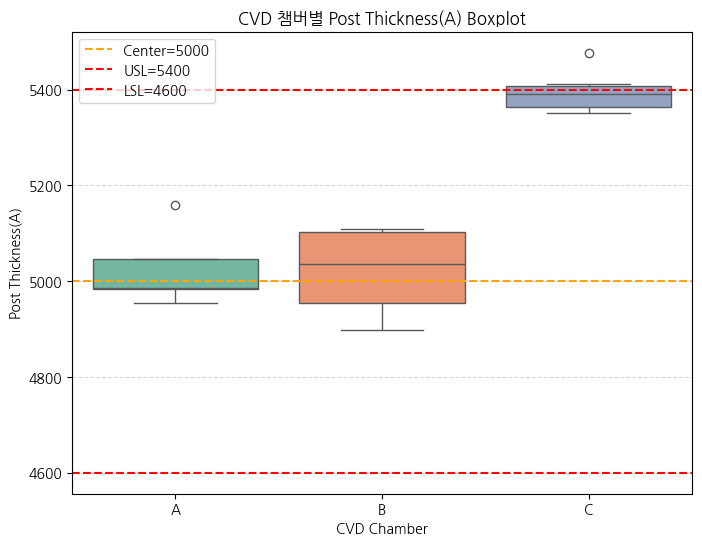

/tmp/ipython-input-2829885065.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order,
/tmp/ipython-input-2829885065.py:29: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order,


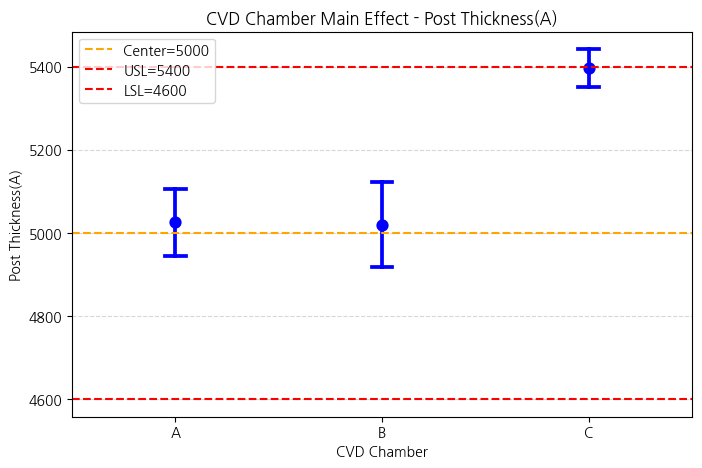

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CVD 적용된 데이터만 선택
cvd_df = df.dropna(subset=["CVD test 적용 이력"])

# 챔버 순서 지정
chamber_order = ["A", "B", "C"]

# -------------------- Boxplot --------------------
plt.figure(figsize=(8,6))
sns.boxplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order, palette="Set2")

# 기준선
plt.axhline(5000, color='orange', linestyle='--', label='Center=5000')
plt.axhline(5400, color='red', linestyle='--', label='USL=5400')
plt.axhline(4600, color='red', linestyle='--', label='LSL=4600')

plt.title("CVD 챔버별 Post Thickness(A) Boxplot")
plt.xlabel("CVD Chamber")
plt.ylabel("Post Thickness(A)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# -------------------- Main Effect Plot --------------------
plt.figure(figsize=(8,5))
sns.pointplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order,
              ci='sd', join=False, capsize=0.1, color='blue')

# 기준선
plt.axhline(5000, color='orange', linestyle='--', label='Center=5000')
plt.axhline(5400, color='red', linestyle='--', label='USL=5400')
plt.axhline(4600, color='red', linestyle='--', label='LSL=4600')

plt.title("CVD Chamber Main Effect - Post Thickness(A)")
plt.xlabel("CVD Chamber")
plt.ylabel("Post Thickness(A)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 5. CVD 이력 분석

/tmp/ipython-input-324421017.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order, palette="Set2")
/tmp/ipython-input-324421017.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order,
/tmp/ipython-input-324421017.py:28: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order,


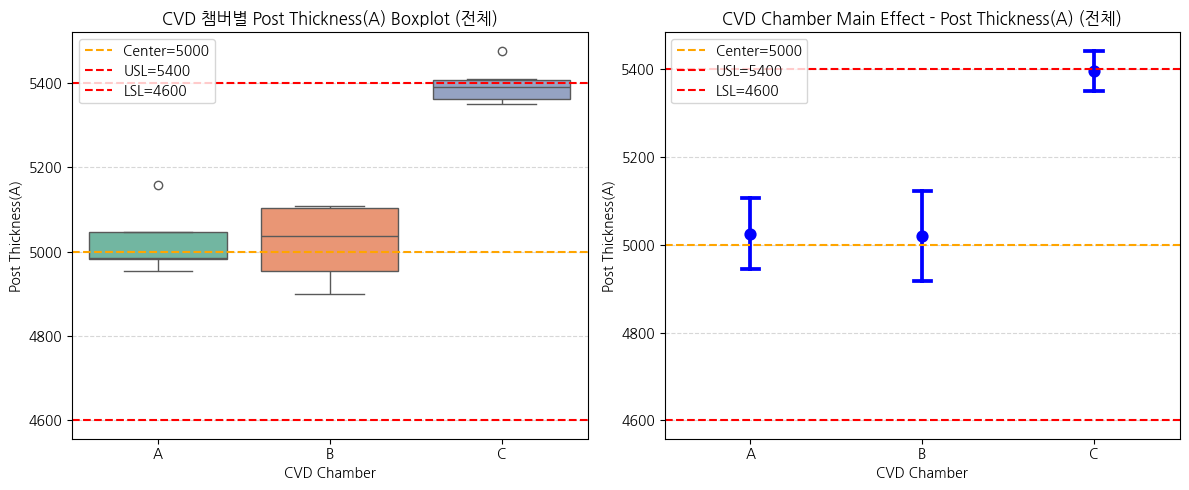

/tmp/ipython-input-324421017.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order, palette="Set2")
/tmp/ipython-input-324421017.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order,
/tmp/ipython-input-324421017.py:61: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order,


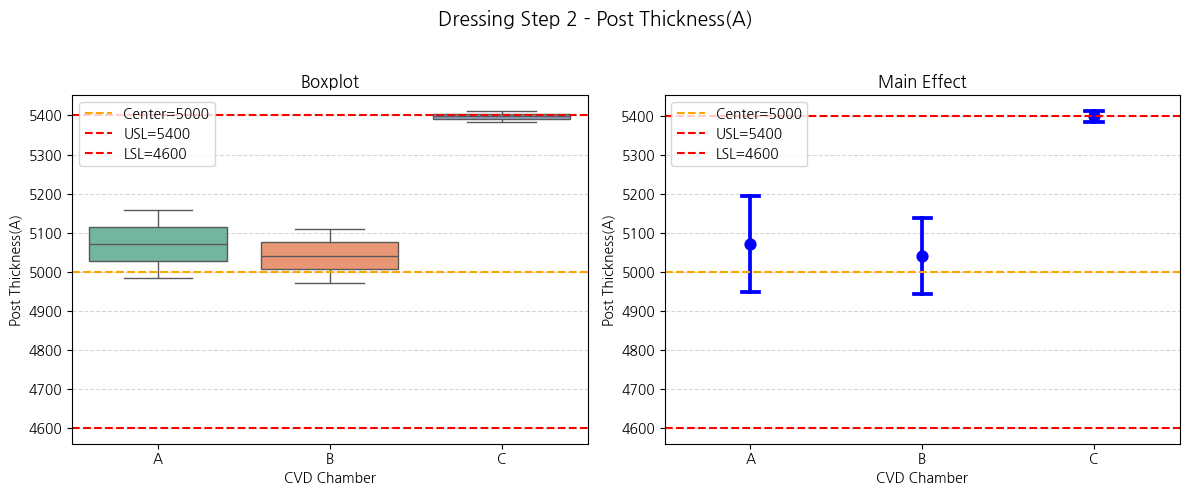

/tmp/ipython-input-324421017.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order, palette="Set2")
/tmp/ipython-input-324421017.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order,
/tmp/ipython-input-324421017.py:61: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order,


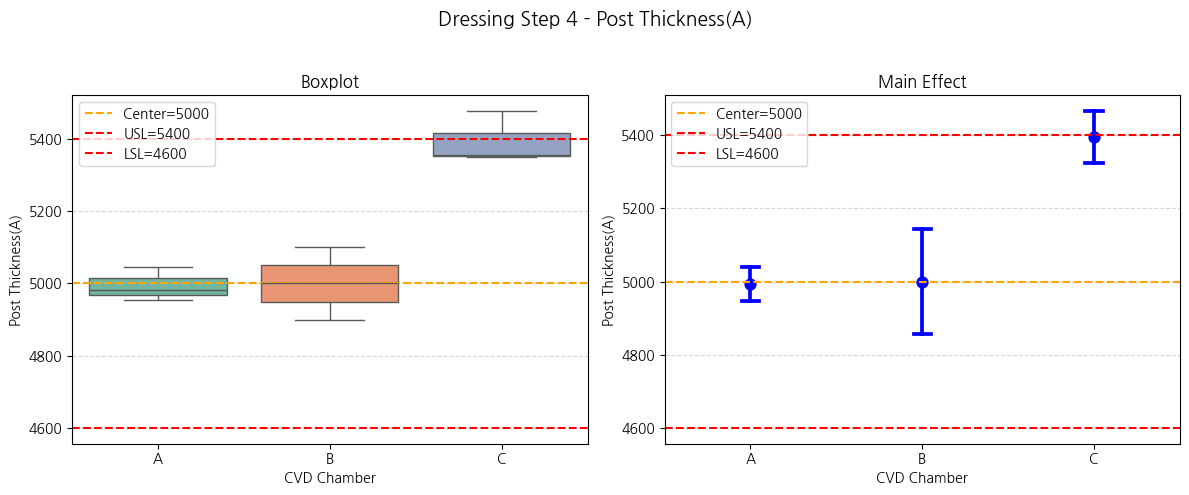

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CVD 적용된 데이터만 선택
cvd_df = df.dropna(subset=["CVD test 적용 이력"])

# 챔버 순서 지정
chamber_order = ["A", "B", "C"]

# -------------------- 전체 Boxplot + Main Effect --------------------
plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order, palette="Set2")
plt.axhline(5000, color='orange', linestyle='--', label='Center=5000')
plt.axhline(5400, color='red', linestyle='--', label='USL=5400')
plt.axhline(4600, color='red', linestyle='--', label='LSL=4600')
plt.title("CVD 챔버별 Post Thickness(A) Boxplot (전체)")
plt.xlabel("CVD Chamber")
plt.ylabel("Post Thickness(A)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Main Effect Plot
plt.subplot(1,2,2)
sns.pointplot(x="Chamber", y="Post Thickness(A)", data=cvd_df, order=chamber_order,
              ci='sd', join=False, capsize=0.1, color='blue')
plt.axhline(5000, color='orange', linestyle='--', label='Center=5000')
plt.axhline(5400, color='red', linestyle='--', label='USL=5400')
plt.axhline(4600, color='red', linestyle='--', label='LSL=4600')
plt.title("CVD Chamber Main Effect - Post Thickness(A) (전체)")
plt.xlabel("CVD Chamber")
plt.ylabel("Post Thickness(A)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# -------------------- CMP Step별 Boxplot --------------------
for step, group in cvd_df.groupby("dressing step sec"):
    plt.figure(figsize=(12,5))
    plt.suptitle(f"Dressing Step {step} - Post Thickness(A)", fontsize=14)

    # Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order, palette="Set2")
    plt.axhline(5000, color='orange', linestyle='--', label='Center=5000')
    plt.axhline(5400, color='red', linestyle='--', label='USL=5400')
    plt.axhline(4600, color='red', linestyle='--', label='LSL=4600')
    plt.title("Boxplot")
    plt.xlabel("CVD Chamber")
    plt.ylabel("Post Thickness(A)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Main Effect
    plt.subplot(1,2,2)
    sns.pointplot(x="Chamber", y="Post Thickness(A)", data=group, order=chamber_order,
                  ci='sd', join=False, capsize=0.1, color='blue')
    plt.axhline(5000, color='orange', linestyle='--', label='Center=5000')
    plt.axhline(5400, color='red', linestyle='--', label='USL=5400')
    plt.axhline(4600, color='red', linestyle='--', label='LSL=4600')
    plt.title("Main Effect")
    plt.xlabel("CVD Chamber")
    plt.ylabel("Post Thickness(A)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

